# Primera Parte: Descripción de los Métodos Simulación Doble Rendija

## multiplicar_matrices(mat1, mat2)
Realiza la multiplicación de dos matrices reales. Multiplica cada fila de la primera matriz (`mat1`) por cada columna de la segunda matriz (`mat2`) y almacena el resultado en una nueva matriz. Los valores resultantes son redondeados a dos decimales.

- **Parámetros**:
  - `mat1`: La primera matriz.
  - `mat2`: La segunda matriz.
- **Retorno**: La matriz resultante de la multiplicación.

## evolucionar_grafo(grafo, clicks_tiempo)
Evoluciona el estado de un grafo dado multiplicando la matriz del grafo por sí misma durante un número determinado de clicks de tiempo.

- **Parámetros**:
  - `grafo`: La matriz de adyacencia que representa el grafo.
  - `clicks_tiempo`: El número de iteraciones (multiplicaciones) que debe realizar el grafo.
- **Retorno**: El grafo resultante después de la evolución temporal.

## calcular_estados(grafo, estado_inicial)
Calcula los estados resultantes de un sistema basado en la matriz de adyacencia de un grafo y un estado inicial dado. Multiplica el grafo por el vector de estados iniciales.

- **Parámetros**:
  - `grafo`: La matriz de adyacencia del grafo.
  - `estado_inicial`: El vector de estado inicial (lista de listas).
- **Retorno**: El vector de estados resultante tras la multiplicación.

## multiplicar_matrices_complejas(mat1, mat2)
Realiza la multiplicación de dos matrices cuyos elementos son números complejos. Se descompone cada número complejo en su parte real e imaginaria y se realiza la multiplicación respetando las reglas de los números complejos.

- **Parámetros**:
  - `mat1`: La primera matriz de números complejos.
  - `mat2`: La segunda matriz de números complejos.
- **Retorno**: La matriz resultante de la multiplicación con números complejos.

## calcular_probabilidades(matriz)
Calcula las probabilidades a partir de una matriz cuántica. Dada una matriz cuyos elementos son números complejos, calcula la probabilidad de cada entrada como la suma de los cuadrados de las partes real e imaginaria de los números.

- **Parámetros**:
  - `matriz`: La matriz cuántica con valores complejos.
- **Retorno**: Una matriz con las probabilidades de cada valor.

## graficar_resultados(resultado, num_nodos, tiempo, etiqueta)
Genera una gráfica de barras para visualizar el estado del sistema en un tiempo determinado. Cada barra representa el valor correspondiente a un nodo del sistema.

- **Parámetros**:
  - `resultado`: Los valores a graficar.
  - `num_nodos`: El número de nodos o vértices.
  - `tiempo`: El tiempo (clicks) en el que se encuentra el sistema.
  - `etiqueta`: La etiqueta del eje `y` para la gráfica.
- **Retorno**: No retorna valor, muestra la gráfica.

## simular_particulas(estado_inicial, grafo, tiempo)
Simula la evolución de un sistema cuántico a través de un grafo en un número determinado de clicks de tiempo. Evoluciona el grafo y calcula el estado final del sistema, reflejando la interferencia de las partículas al pasar por las rendijas.

- **Parámetros**:
  - `estado_inicial`: El estado inicial del sistema (vector).
  - `grafo`: La matriz de adyacencia que representa el grafo.
  - `tiempo`: El número de clicks de tiempo.
- **Retorno**: El estado final del sistema.

## simular_multiplicacion_matrices(estado_inicial, grafo)
Simula la multiplicación clásica de matrices al aplicar dos clicks de tiempo sobre un grafo y luego calcular el estado resultante.

- **Parámetros**:
  - `estado_inicial`: El estado inicial del sistema (vector).
  - `grafo`: La matriz de adyacencia que representa el grafo.
- **Retorno**: El estado final del sistema tras dos multiplicaciones.

## simular_cuantico(estado_inicial, grafo)
Simula la evolución cuántica de un sistema a través de un grafo. Multiplica la matriz del grafo en el dominio de los números complejos, calcula las probabilidades y el estado final del sistema, representando el comportamiento de las partículas en el experimento de la doble rendija.

- **Parámetros**:
  - `estado_inicial`: El estado inicial del sistema (vector).
  - `grafo`: La matriz de adyacencia compleja que representa el grafo.
- **Retorno**: El estado final del sistema basado en las probabilidades cuánticas.

In [8]:
from matplotlib import pyplot as plt
import math

# Multiplicación de matrices
def multiplicar_matrices(mat1, mat2):
    resultado = []
    for i in range(len(mat1)):
        fila_resultado = []
        for j in range(len(mat2[0])):
            valor = sum(float(mat1[i][k]) * float(mat2[k][j]) for k in range(len(mat1[0])))
            fila_resultado.append(round(valor, 2))
        resultado.append(fila_resultado)
    return resultado

# Evolución temporal de un grafo
def evolucionar_grafo(grafo, clicks_tiempo):
    grafo_actual = grafo
    for _ in range(1, clicks_tiempo):
        grafo_actual = multiplicar_matrices(grafo, grafo_actual)
    return grafo_actual

# Calcula los estados resultantes en base a un grafo y un estado inicial
def calcular_estados(grafo, estado_inicial):
    resultado = []
    for i in range(len(grafo)):
        valor = sum(grafo[i][k] * estado_inicial[k][0] for k in range(len(grafo[0])))
        resultado.append(valor)
    return resultado

# Multiplicación de matrices cuánticas
def multiplicar_matrices_complejas(mat1, mat2):
    resultado = []
    for i in range(len(mat1)):
        fila_resultado = []
        for j in range(len(mat2[0])):
            parte_real = sum(mat1[i][k][0] * mat2[k][j][0] - mat1[i][k][1] * mat2[k][j][1] for k in range(len(mat1[0])))
            parte_imaginaria = sum(mat1[i][k][0] * mat2[k][j][1] + mat1[i][k][1] * mat2[k][j][0] for k in range(len(mat1[0])))
            fila_resultado.append((round(parte_real, 4), round(parte_imaginaria, 4)))
        resultado.append(fila_resultado)
    return resultado

# Calcula las probabilidades del grafo
def calcular_probabilidades(matriz):
    return [[round(complejo[0]**2 + complejo[1]**2, 4) for complejo in fila] for fila in matriz]

# Graficar los resultados
def graficar_resultados(resultado, num_nodos, tiempo, etiqueta):
    nombres_nodos = [str(i) for i in range(num_nodos)]
    colores = ["blue", "red", "green", "black", "purple"]
    
    plt.title(f"Estado del sistema en el tiempo {tiempo} clicks: ")
    plt.bar(nombres_nodos, height=resultado, color=colores, width=0.5)
    plt.xlabel("Vértices")
    plt.ylabel(etiqueta)
    plt.show()

# Simulación de particulas
def simular_particulas(estado_inicial, grafo, tiempo):
    grafo_evolucionado = evolucionar_grafo(grafo, tiempo)
    resultado = calcular_estados(grafo_evolucionado, estado_inicial)
    return resultado

# Simulación clásica de multiplicación de matrices
def simular_multiplicacion_matrices(estado_inicial, grafo):
    grafo_evolucionado = evolucionar_grafo(grafo, 2)
    return calcular_estados(grafo_evolucionado, estado_inicial)

# Simulación cuántica
def simular_cuantico(estado_inicial, grafo):
    grafo_evolucionado = multiplicar_matrices_complejas(grafo, grafo)
    probabilidades = calcular_probabilidades(grafo_evolucionado)
    return calcular_estados(probabilidades, estado_inicial)


# Segunda Parte Descripción de los Métodos Simulación Doble Rendija

## crear_grafo_cuantico(num_nodos, num_rendijas)
Este método genera un grafo cuántico representado por una matriz de adyacencia, donde las conexiones entre los nodos representan probabilidades complejas. Los nodos iniciales se conectan a las rendijas, y las rendijas se conectan a los objetivos. Se solicita al usuario ingresar las probabilidades de las conexiones entre rendijas y objetivos en forma de números complejos.

- **Parámetros**:
  - `num_nodos`: El número total de nodos, que incluye el nodo inicial, las rendijas y los objetivos.
  - `num_rendijas`: El número de rendijas que participan en el experimento.
- **Retorno**: Retorna una matriz de adyacencia cuántica, donde cada elemento es un número complejo representado como una tupla `(real, imaginario)`.

## experimento_rendijas_cuantico()
Simula el experimento cuántico de múltiples rendijas. Pide al usuario el número de rendijas y objetivos, luego construye el grafo cuántico utilizando el método `crear_grafo_cuantico()`. Posteriormente, muestra el estado inicial del sistema, el grafo cuántico en números complejos, y las probabilidades asociadas. Luego, simula el comportamiento del sistema tras dos "clicks" de tiempo, calculando las probabilidades y mostrando el estado final. Finalmente, grafica los resultados en forma de porcentaje.

- **Parámetros**: Ninguno.
- **Retorno**: No retorna ningún valor, pero muestra múltiples resultados en la consola y genera una gráfica del estado final del sistema.

Con qué probabilidad llega el fotón al objetivo 1 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 1 desde la rendija 2:

El estado del sistema al inicio es:

[[1], [0], [0], [0]]

El estado del grafo con números complejos es: 

[(0, 0), (0, 0), (0, 0), (0, 0)]
[(0.7071, 0), (0, 0), (0, 0), (0, 0)]
[(0.7071, 0), (0, 0), (0, 0), (0, 0)]
[(0, 0), (0.6, 0.4), (0.4, 0.6), (1, 0)]

El estado del grafo en probabilidad es: 

[0, 0, 0, 0]
[0.5, 0, 0, 0]
[0.5, 0, 0, 0]
[0, 0.52, 0.52, 1]

El estado del grafo después de 2 time clicks es: 

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0, 0)]
[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]
[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]
[(0.7071, 0.7071), (0.6, 0.4), (0.4, 0.6), (1.0, 0.0)]

El estado del grafo en probabilidad después de 2 time clicks es:

[0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.52, 0.52, 1.0]

El estado del sistema después de 2 time clicks es:

[0.0, 0.0, 0.0, 1.0]


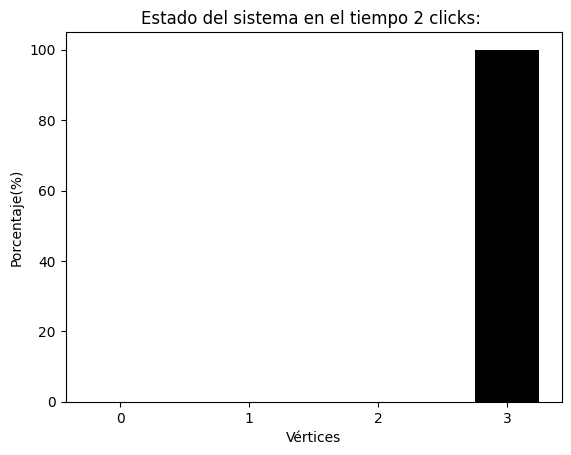

In [10]:
# Experimento de las múltiples rendijas cuántico
def crear_grafo_cuantico(num_nodos, num_rendijas):
    # Inicializar el grafo cuántico con nodos y rendijas
    grafo = []
    # Crear la matriz de adyacencia
    for i in range(num_nodos):
        fila = []
        for j in range(num_nodos):
            # Nodo inicial conectado a las rendijas
            if i == 0:
                probabilidad = (0, 0)
                fila.append(probabilidad)
            # Conexiones de las rendijas al nodo inicial
            elif i <= num_rendijas:
                if j == 0:
                    # Definir la probabilidad de que una partícula pase por la rendija
                    probabilidad = (round((1 / math.sqrt(num_rendijas)), 4), 0)
                else:
                    probabilidad = (0, 0)
                fila.append(probabilidad)
            # Conexiones desde las rendijas a los objetivos
            else:
                if 0 < j <= num_rendijas:
                    # Solicitar la probabilidad al usuario de que el fotón pase de una rendija a un objetivo
                    print(f"Con qué probabilidad llega el fotón al objetivo {i - num_rendijas} desde la rendija {j}:")
                    prob_real = float(input("Parte real de la probabilidad: "))
                    prob_imag = float(input("Parte imaginaria de la probabilidad: "))
                    probabilidad = (prob_real, prob_imag)
                    fila.append(probabilidad)    
                elif j == i:
                    fila.append((1, 0)) # Nodo conectado a sí mismo
                else:
                    fila.append((0, 0)) # No hay conexión
        grafo.append(fila)
    return grafo

def experimento_rendijas_cuantico():
    num_rendijas = int(input("Dame el número de rendijas que quieres usar: "))
    num_objetivos = int(input("Dame el número de objetivos que quieres usar: "))
    num_nodos = num_rendijas + num_objetivos + 1
    estado_inicial = [[1]] + [[0] for _ in range(num_nodos - 1)]
    
    grafo = crear_grafo_cuantico(num_nodos, num_rendijas)
    
    print("\nEl estado del sistema al inicio es:\n")
    print(estado_inicial)
    
    print("\nEl estado del grafo con números complejos es: \n")
    for fila in grafo:
        print(fila)
    
    print("\nEl estado del grafo en probabilidad es: \n")
    for fila_probabilidad in calcular_probabilidades(grafo):
        print(fila_probabilidad)
    
    print("\nEl estado del grafo después de 2 time clicks es: \n")
    grafo_tras_dos_clicks = multiplicar_matrices_complejas(grafo, grafo)
    for fila in grafo_tras_dos_clicks:
        print(fila)
    
    print("\nEl estado del grafo en probabilidad después de 2 time clicks es:\n")
    for fila_probabilidad in calcular_probabilidades(grafo_tras_dos_clicks):
        print(fila_probabilidad)
    
    print("\nEl estado del sistema después de 2 time clicks es:\n")
    estado_final = calcular_estados(calcular_probabilidades(grafo_tras_dos_clicks), estado_inicial)
    print(estado_final)
    
    for i in range(len(estado_final)):
        estado_final[i] *= 100
    
    graficar_resultados(estado_final, num_nodos, 2, "Porcentaje(%)")

# Ejecuta el experimento de las rendijas cuántico
experimento_rendijas_cuantico()